In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dataset_48_tae (1).csv')
print('No. of rows and columns in the dataset : ', df.shape)

df.head()

No. of rows and columns in the dataset :  (151, 6)


,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


## Renaming the columns

In [3]:
df.rename(columns = {'Whether_of_not_the_TA_is_a_native_English_speaker' : 'Native_English_speaker', 'Course_instructor' : 'Instructor', 'Course' : 'Course', 'Summer_or_regular_semester' : 'Summer_or_regular', 'Class_size' : 'Class_size', 'Class_attribute' : 'Performance'}, inplace = True)

df.head()

,Native_English_speaker,Instructor,Course,Summer_or_regular,Class_size,Performance
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Native_English_speaker  151 non-null    int64
 1   Instructor              151 non-null    int64
 2   Course                  151 non-null    int64
 3   Summer_or_regular       151 non-null    int64
 4   Class_size              151 non-null    int64
 5   Performance             151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [5]:
df.describe()

,Native_English_speaker,Instructor,Course,Summer_or_regular,Class_size,Performance
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [6]:
df.isnull().sum()

Native_English_speaker    0
Instructor                0
Course                    0
Summer_or_regular         0
Class_size                0
Performance               0
dtype: int64

## Outliers

<AxesSubplot:>

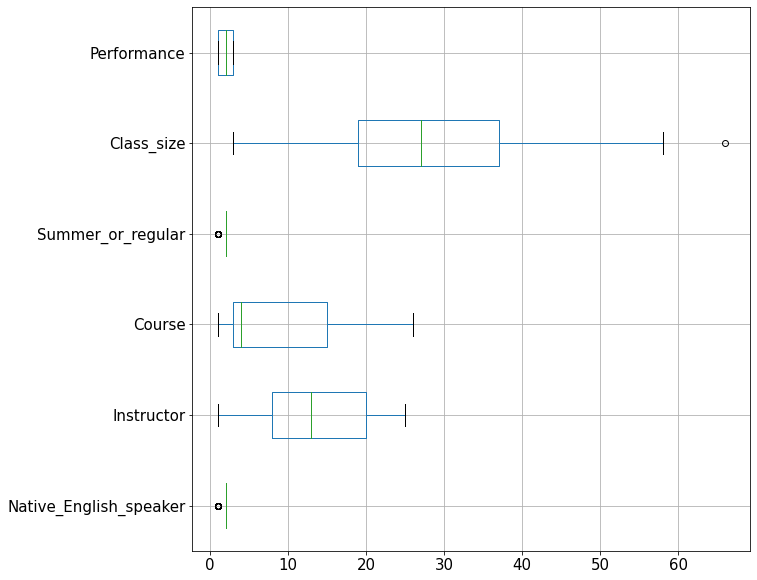

In [7]:
df.boxplot(figsize = (10,10), fontsize = 15, vert = False)

In [8]:
print('Unique Values\n')
print('Native English speaker or not :\n', list(df.Native_English_speaker.unique()))
print('Course Instructor :\n', list(df.Instructor.unique()))
print('Course :\n', list(df.Course.unique()))
print('Summer_or_regular :\n', list(df.Summer_or_regular.unique()))
print('No. of Students in the class :\n', list(df.Class_size.unique()))
print('Teaching Performance :\n', list(df.Performance.unique()))

Unique Values

Native English speaker or not :
 [1, 2]
Course Instructor :
 [23, 15, 5, 7, 9, 10, 22, 13, 18, 6, 25, 2, 1, 8, 14, 21, 11, 16, 4, 17, 20, 12, 24, 3, 19]
Course :
 [3, 2, 11, 5, 22, 1, 21, 17, 25, 7, 9, 15, 13, 8, 16, 19, 14, 6, 12, 18, 23, 26, 24, 20, 4, 10]
Summer_or_regular :
 [1, 2]
No. of Students in the class :
 [19, 17, 49, 33, 55, 20, 27, 58, 9, 30, 29, 39, 42, 43, 10, 46, 23, 31, 22, 37, 13, 24, 38, 28, 51, 36, 21, 48, 25, 11, 45, 18, 14, 35, 15, 32, 34, 66, 12, 3, 7, 54, 16, 44, 5, 26]
Teaching Performance :
 [3, 2, 1]


#### Language
- 1 = English speaker
- 2 = Not English speaker

#### Course type
- 1 = Summer
- 2 = Regular

#### Performance
- 1 = Low
- 2 = Medium
- 3 = Good

In [9]:
print('Unique Value counts\n')
print('Native English speaker or not\n',df.Native_English_speaker.value_counts().sort_values())
print('Summer_or_regular\n',df.Summer_or_regular.value_counts().sort_values())
print('Teaching Performance\n',df.Performance.value_counts().sort_values())

Unique Value counts

Native English speaker or not
 1     29
2    122
Name: Native_English_speaker, dtype: int64
Summer_or_regular
 1     23
2    128
Name: Summer_or_regular, dtype: int64
Teaching Performance
 1    49
2    50
3    52
Name: Performance, dtype: int64


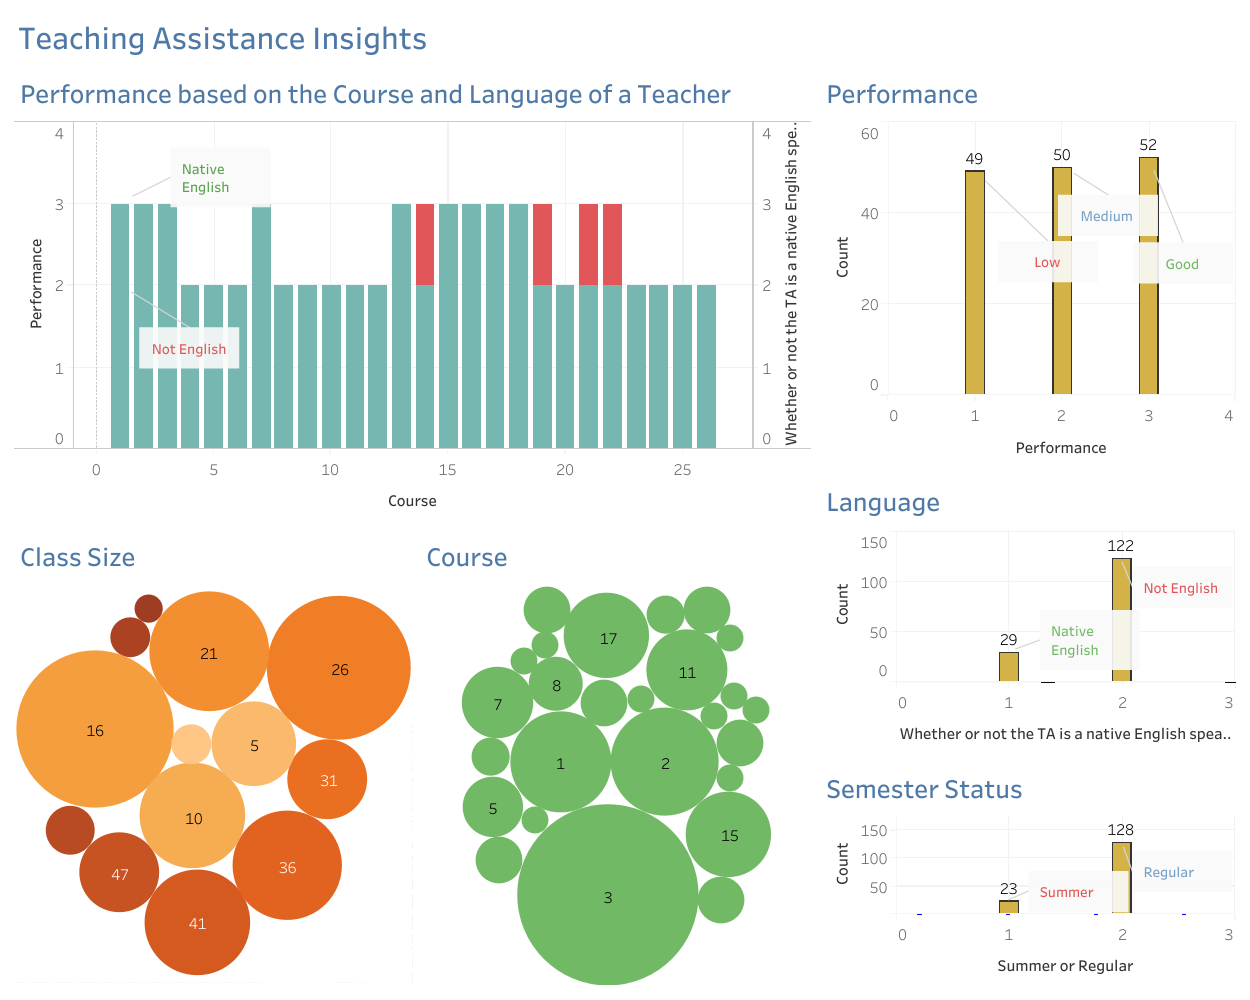

In [10]:
from IPython.display import Image
Image(filename = 'C:/Users/God/Desktop/Sindhu/Projects/PRCP-1026-TeachingAssistance/TA Insights.png')

In [11]:
def partition(x):
    if x == 2:
        return 0
    return 1

df['Native_English_speaker'] = df['Native_English_speaker'].map(partition)

In [12]:
def partition(y):
    if y == 2:
        return 0
    return 1

df['Summer_or_regular'] = df['Summer_or_regular'].map(partition)

In [13]:
df.head()

,Native_English_speaker,Instructor,Course,Summer_or_regular,Class_size,Performance
0,1,23,3,1,19,3
1,0,15,3,1,17,3
2,1,23,3,0,49,3
3,1,5,2,0,33,3
4,0,7,11,0,55,3


In [14]:
print('Unique Value counts\n')
print('Native English speaker or not\n',df.Native_English_speaker.value_counts().sort_values())
print('Summer_or_regular\n',df.Summer_or_regular.value_counts().sort_values())
print('Teaching Performance\n',df.Performance.value_counts().sort_values())

Unique Value counts

Native English speaker or not
 1     29
0    122
Name: Native_English_speaker, dtype: int64
Summer_or_regular
 1     23
0    128
Name: Summer_or_regular, dtype: int64
Teaching Performance
 1    49
2    50
3    52
Name: Performance, dtype: int64


# Correlation

In [15]:
df.corr().Performance

Native_English_speaker    0.255466
Instructor                0.075095
Course                    0.143103
Summer_or_regular         0.282742
Class_size               -0.035676
Performance               1.000000
Name: Performance, dtype: float64

<AxesSubplot:>

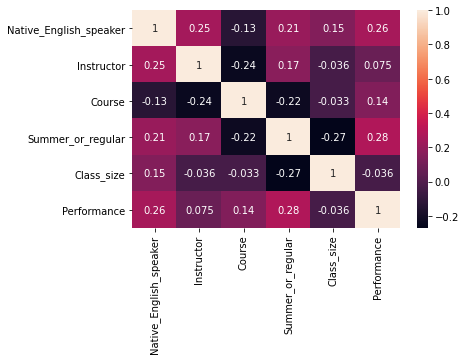

In [16]:
sb.heatmap(df.corr(), annot = True)

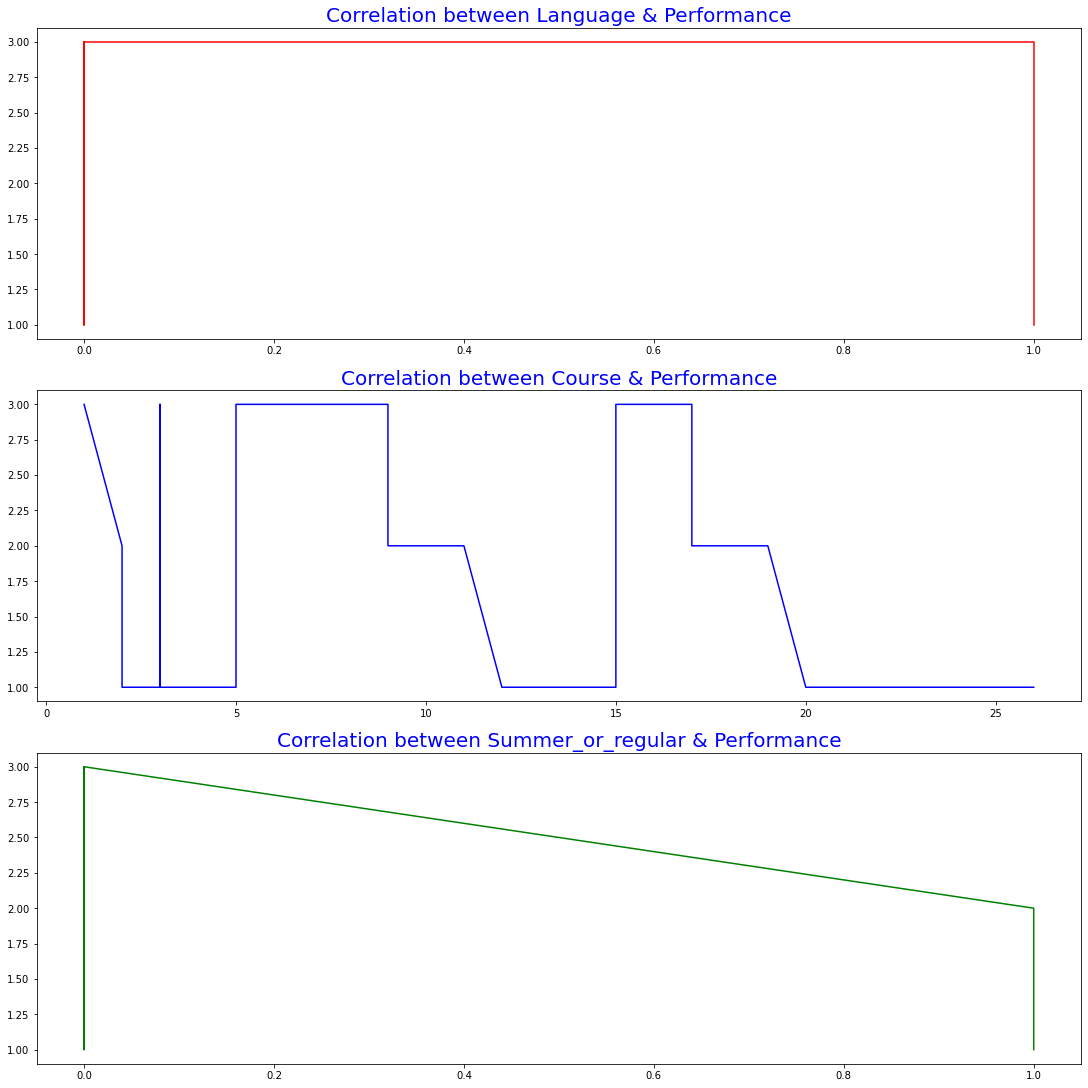

In [17]:
rcParams['figure.figsize'] = (15,15)
fig, (ax1,ax2,ax3) =plt.subplots(3,1, constrained_layout=True)

ax1.plot(df.Native_English_speaker.sort_values(ascending = True), df.Performance, color = 'r')
ax1.set_title('Correlation between Language & Performance', color = 'b', fontsize = 20)

ax2.plot(df.Course.sort_values(ascending = True), df.Performance, color = 'blue')
ax2.set_title('Correlation between Course & Performance', color = 'b', fontsize = 20)

ax3.plot(df.Summer_or_regular.sort_values(ascending = True), df.Performance, color = 'green')
ax3.set_title('Correlation between Summer_or_regular & Performance', color = 'b', fontsize = 20)

plt.show()

## Split the predictors and the target

In [18]:
x = df.iloc[:,0:5]
y = df.Performance

In [19]:
x.head()

,Native_English_speaker,Instructor,Course,Summer_or_regular,Class_size
0,1,23,3,1,19
1,0,15,3,1,17
2,1,23,3,0,49
3,1,5,2,0,33
4,0,7,11,0,55


In [20]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Performance, dtype: int64

# Train Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [22]:
print('X Train :', x_train.shape)
print('X Test :', x_test.shape)
print('Y Train :', y_train.shape)
print('Y Test :', y_test.shape)

X Train : (120, 5)
X Test : (31, 5)
Y Train : (120,)
Y Test : (31,)


# Model Selection

## 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [24]:
y_predict=model.predict(x_test)
lr = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
lr1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', lr)
print('Train Accuracy :', lr1)

Test Accuracy : 0.45161290322580644
Train Accuracy : 0.5166666666666667


In [25]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,5,0,0
2,4,5,3
3,9,1,4


In [27]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.28      1.00      0.43         5
           2       0.83      0.42      0.56        12
           3       0.57      0.29      0.38        14

    accuracy                           0.45        31
   macro avg       0.56      0.57      0.46        31
weighted avg       0.63      0.45      0.46        31

              precision    recall  f1-score   support

           1       0.55      0.77      0.64        44
           2       0.45      0.39      0.42        38
           3       0.52      0.34      0.41        38

    accuracy                           0.52       120
   macro avg       0.51      0.50      0.49       120
weighted avg       0.51      0.52      0.50       120



## 2. Naive Bayes

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()   
model.fit(x_train, y_train)

GaussianNB()

In [31]:
y_predict=model.predict(x_test)
nb = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
nb1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', nb)
print('Train Accuracy :', nb1)

Test Accuracy : 0.5806451612903226
Train Accuracy : 0.5583333333333333


In [32]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,6,3,1
2,3,4,2
3,1,3,8


In [33]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60        10
           2       0.40      0.44      0.42         9
           3       0.73      0.67      0.70        12

    accuracy                           0.58        31
   macro avg       0.58      0.57      0.57        31
weighted avg       0.59      0.58      0.59        31

              precision    recall  f1-score   support

           1       0.52      0.82      0.64        39
           2       0.55      0.39      0.46        41
           3       0.63      0.47      0.54        40

    accuracy                           0.56       120
   macro avg       0.57      0.56      0.55       120
weighted avg       0.57      0.56      0.55       120



## 3. KNN

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [54]:
y_predict=model.predict(x_test)
knn = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
knn1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', knn)
print('Train Accuracy :', knn1)

Test Accuracy : 0.4838709677419355
Train Accuracy : 0.5166666666666667


In [55]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,6,2,3
2,4,7,0
3,3,4,2


In [56]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.46      0.55      0.50        11
           2       0.54      0.64      0.58        11
           3       0.40      0.22      0.29         9

    accuracy                           0.48        31
   macro avg       0.47      0.47      0.46        31
weighted avg       0.47      0.48      0.47        31

              precision    recall  f1-score   support

           1       0.50      0.42      0.46        38
           2       0.51      0.54      0.53        39
           3       0.53      0.58      0.56        43

    accuracy                           0.52       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.52      0.52      0.51       120



## 4. SVM

In [57]:
params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1.0, 25.0, 50.0, 100, 150],
    'gamma': [0.01, 0.1, 1.0, 10.0, 20.0]
}

# Checks 2x6x5 = 60 combinations

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVC(), param_grid=params, verbose=2)  # GridSearchCV helps show all the combinations
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=25.0, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END ...................C=25.0, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   1.6s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   1.4s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.8s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 25.0, 50.0, 100, 150],
                         'gamma': [0.01, 0.1, 1.0, 10.0, 20.0],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [59]:
gscv.best_params_

{'C': 25.0, 'gamma': 10.0, 'kernel': 'rbf'}

In [60]:
gscv.best_score_

0.5583333333333333

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [71]:
model=SVC(C = 25, gamma = 10, kernel='rbf')  # using the params we get from the best params
model.fit(x_train, y_train)

SVC(C=25, gamma=10)

In [72]:
y_predict=model.predict(x_test)
svm = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
svm1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', svm)
print('Train Accuracy :', svm1)

Test Accuracy : 0.5483870967741935
Train Accuracy : 0.975


In [73]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,6,0,1
2,5,8,1
3,7,0,3


In [74]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.33      0.86      0.48         7
           2       1.00      0.57      0.73        14
           3       0.60      0.30      0.40        10

    accuracy                           0.55        31
   macro avg       0.64      0.58      0.54        31
weighted avg       0.72      0.55      0.57        31

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        42
           2       1.00      0.92      0.96        36
           3       0.98      1.00      0.99        42

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## 5. Random Forest

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state = 0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [82]:
y_predict=model.predict(x_test)
rf = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
rf1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', rf)
print('Train Accuracy :', rf1)

Test Accuracy : 0.6451612903225806
Train Accuracy : 0.9583333333333334


In [83]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,4,2,1
2,4,7,3
3,1,0,9


In [84]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.44      0.57      0.50         7
           2       0.78      0.50      0.61        14
           3       0.69      0.90      0.78        10

    accuracy                           0.65        31
   macro avg       0.64      0.66      0.63        31
weighted avg       0.67      0.65      0.64        31

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        42
           2       1.00      0.86      0.93        36
           3       0.95      1.00      0.98        42

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



## 6. XG Boost

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8)

from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(x_train,y_train)

C:\Users\God\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [86]:
y_predict=model.predict(x_test)
xgb = accuracy_score(y_test,y_predict)

y_predict1=model.predict(x_train)
xgb1 = accuracy_score(y_train,y_predict1)

print('Test Accuracy :', xgb)
print('Train Accuracy :', xgb1)

Test Accuracy : 0.7419354838709677
Train Accuracy : 0.9583333333333334


In [87]:
pd.crosstab(y_test, y_predict)

col_0,1,2,3
Performance,,,
1,12,0,1
2,4,3,2
3,1,0,8


In [88]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           2       1.00      0.33      0.50         9
           3       0.73      0.89      0.80         9

    accuracy                           0.74        31
   macro avg       0.81      0.72      0.70        31
weighted avg       0.80      0.74      0.71        31

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        36
           2       0.97      0.93      0.95        41
           3       0.93      0.98      0.95        43

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



## Comparison

In [90]:
details = {
    'Algorithm' : ['Logistic', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'XG Boost'],
    
    'Test Score' : ["{:0.1f}".format(lr*100),
                    "{:0.1f}".format(nb*100),
                    "{:0.1f}".format(knn*100),
                    "{:0.1f}".format(svm*100),
                    "{:0.1f}".format(rf*100),
                    "{:0.1f}".format(xgb*100)],
    
    'Train Score' : ["{:0.1f}".format(lr1*100),
                    "{:0.1f}".format(nb1*100),
                    "{:0.1f}".format(knn1*100),
                    "{:0.1f}".format(svm1*100),
                    "{:0.1f}".format(rf1*100),
                    "{:0.1f}".format(xgb1*100)]
}

compare = pd.DataFrame(details)
compare

,Algorithm,Test Score,Train Score
0,Logistic,45.2,51.7
1,Naive Bayes,58.1,55.8
2,KNN,48.4,51.7
3,SVM,54.8,97.5
4,Random Forest,64.5,95.8
5,XG Boost,74.2,95.8


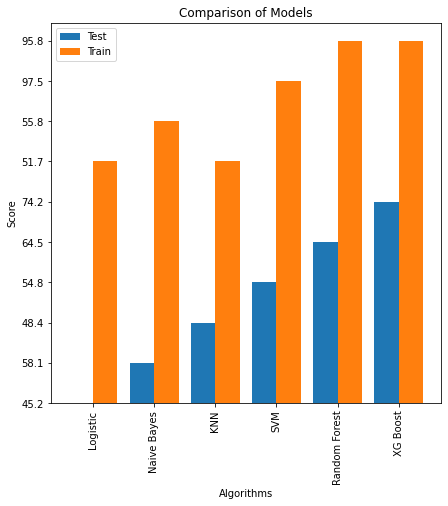

In [92]:
plt.figure(figsize = (7,7))
w = 0.4
x = compare.Algorithm
axis = np.arange(len(x))
plt.bar(axis - 0.2, compare['Test Score'], 0.4, label = 'Test')
plt.bar(axis + 0.2, compare['Train Score'], 0.4, label = 'Train')

plt.xticks(axis, x, rotation = 'vertical')
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.title('Comparison of Models')
plt.legend()
plt.show()